In [21]:
import cv2
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import timm
import torch
import torch.nn as nn
import timm
from facenet_pytorch import MTCNN
from PIL import Image
import torchvision.transforms as transforms
from dataset import FacialLandmarkDataset

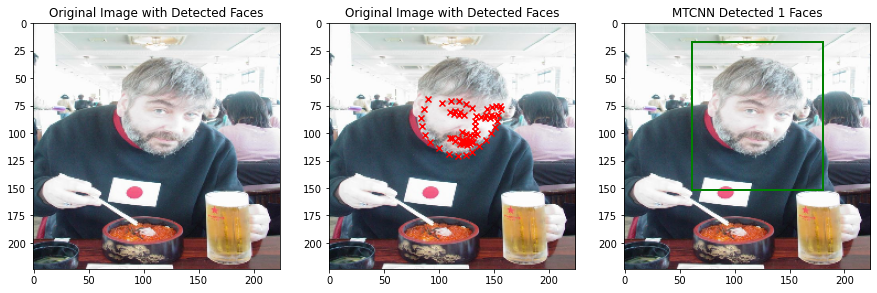

In [22]:
mtcnn = MTCNN(keep_all=True)

dataset = FacialLandmarkDataset(root_dir='archive/ibug_300W_large_face_landmark_dataset/afw')
img, landmark_list = dataset.__getitem__(7)

# Convert image to RGB as YOLO expects RGB input
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

boxes, _ = mtcnn.detect(img_rgb)
margin = 0.4

# Plot the original image with bounding boxes
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Original Image with Detected Faces')

plt.subplot(1, 3, 2)
plt.imshow(img_rgb)
for landmarks in landmark_list:
    plt.scatter(landmarks[:, 0], landmarks[:, 1], c='r', marker='x')
plt.title('Original Image with Detected Faces')

plt.subplot(1, 3, 3)
plt.imshow(img_rgb)
if boxes is not None:
    for box in boxes:
        x1, y1, x2, y2 = box.astype(int)
        width, height = x2 - x1, y2 - y1
        x1 = max(0, x1 - int(margin * width))
        y1 = max(0, y1 - int(margin * height))
        x2 = min(img_rgb.shape[1], x2 + int(margin * width))
        y2 = min(img_rgb.shape[0], y2 + int(margin * height))
        
        # Draw the enlarged bounding box
        plt.plot([x1, x2], [y1, y1], color='g', linewidth=2)  # Top line
        plt.plot([x2, x2], [y1, y2], color='g', linewidth=2)  # Right line
        plt.plot([x2, x1], [y2, y2], color='g', linewidth=2)  # Bottom line
        plt.plot([x1, x1], [y2, y1], color='g', linewidth=2)  # Left line

plt.title(f'MTCNN Detected {len(boxes) if boxes is not None else 0} Faces')

plt.show()